In [1]:
import numpy as np
from matplotlib import style
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pandas as pd

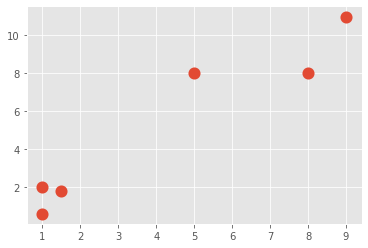

In [27]:
style.use('ggplot')
xs = np.array([[1, 2],[1.5, 1.8],[5, 8],[8, 8],[1, 0.6],[9, 11]])
plt.scatter(xs[:,0],xs[:,1],s=50,linewidths=5)
plt.show()

In [28]:
class KMeans:
    def __init__(self,k=2,tol=0.001,max_iter=300):#tol and max_iter are exit conditions for out algorithm
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
    def train(self,data):
        self.means= {}
        for i in range(self.k):
            self.means[i] = data[i] #initializing the means
        for i in range(self.max_iter):
            self.clusters = {} #initializing clusters dictionary
            for j in range(self.k):
                self.clusters[j] = [] #initializing clusters
            for x in data:
                distances=[]
                for mean in self.means:
                    distances.append(np.linalg.norm(x-self.means[mean]))
                    cluster = distances.index(min(distances))
                    self.clusters[cluster].append(x)
            prev_means = dict(self.means) #for comparing with new ones to define tolerance condition
            for cluster in self.clusters:
                self.means[cluster] = np.average(self.clusters[cluster],axis=0)
            finished = True
            for mean in self.means:
                if (np.sum(self.means[mean]-prev_means[mean])>self.tol):
                    print(np.sum(self.means[mean]-prev_means[mean]))
                    finished =False
            if (finished):
                break
                
    def predict(self,data):
        distances=[]
        for mean in self.means:
            distances.append(np.linalg.norm(data-self.means[mean]))
            cluster = distances.index(min(distances))
        return cluster

    

In [29]:
classifier = KMeans()
classifier.train(xs)

5.557142857142858
7.480000000000001
5.553333333333332


[3.22222222 3.97777778]
[7.33333333 9.        ]


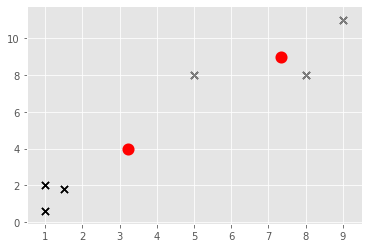

In [30]:
#plotting
for mean in classifier.means:
    print(classifier.means[mean])
    plt.scatter(classifier.means[mean][0],classifier.means[mean][1],c='r',s=50,marker='o',linewidths=5)

for cluster in classifier.clusters:
    for x in classifier.clusters[cluster]:
        plt.scatter(x[0],x[1],c=str(cluster/2),marker='x',s=50,linewidths=5)



[3.22222222 3.97777778]
[7.33333333 9.        ]


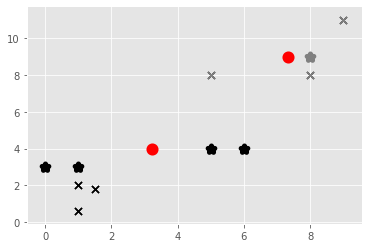

In [31]:
# prediction section
for mean in classifier.means:
    print(classifier.means[mean])
    plt.scatter(classifier.means[mean][0],classifier.means[mean][1],c='r',s=50,marker='o',linewidths=5)

for cluster in classifier.clusters:
    for x in classifier.clusters[cluster]:
        plt.scatter(x[0],x[1],c=str(cluster/2),marker='x',s=50,linewidths=5)

unknowns = np.array([
    [1,3],
    [8,9],
    [0,3],
    [5,4],
    [6,4],
])
for unknown in unknowns:
    cluster = classifier.predict(unknown)
    plt.scatter(unknown[0],unknown[1],marker="*",c=str(cluster/2),s=50,linewidths=5)
plt.show()